### The logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.
### This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.
### Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one. In marketing, it may be used to predict if a given user (or group of users) will buy a certain product or not. An online education company might use logistic regression to predict whether a student will complete their course on time or not.
### As you can see, logistic regression is used to predict the likelihood of all kinds of “yes” or “no” outcomes. By predicting such outcomes, logistic regression helps data analysts (and the companies they work for) to make informed decisions.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
d = pd.read_csv("../input/TitanicDataset/titanic_data.csv")
#remove the columns that we wont be using
d.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'Fare'], axis=1, inplace = True)
d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


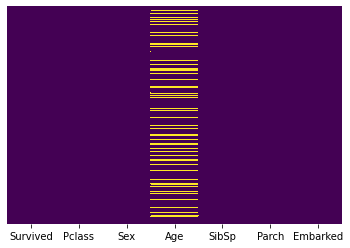

In [2]:
sns.heatmap(d.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#we will fill the missing data in age column by the avg age

In [3]:
d.groupby('Pclass').mean()
#find average ages according to the Pclass

,Survived,Age,SibSp,Parch
Pclass,,,,
1,0.629630,38.233441,0.416667,0.356481
2,0.472826,29.877630,0.402174,0.380435
3,0.242363,25.140620,0.615071,0.393075


In [4]:
#make a fnction to fill in the missing age values
def func(cols):
    Age = cols[0]
    Pclass = cols[1]
   
    if pd.isnull(Age):
       
         if Pclass == 1:
            return 38
         elif Pclass == 2:
            return 30
         else:
            return 25
    else:
            return Age


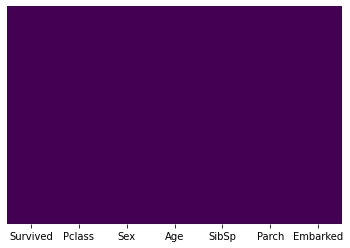

In [5]:
d['Age'] = d[['Age', 'Pclass']].apply(func, axis=1)
sns.heatmap(d.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#now check for null values in age

In [6]:
#we have created dummy variables for M and F in sex colmn so that it can be fed to our ML model
#1 means passenger is male and 0 means a female
d.dropna(inplace=True)
gender = pd.get_dummies(d['Sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [7]:
#same for the embarked column
embark = pd.get_dummies(d['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [8]:
d=pd.concat([d,gender,embark], axis=1)
d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,male,Q,S
0,0,3,male,22.0,1,0,S,1,0,1
1,1,1,female,38.0,1,0,C,0,0,0
2,1,3,female,26.0,0,0,S,0,0,1
3,1,1,female,35.0,1,0,S,0,0,1
4,0,3,male,35.0,0,0,S,1,0,1


In [9]:
#drop the columns that can't be fed to ML model
d.drop(['Sex','Embarked'],axis=1, inplace=True)
d.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [10]:
x = d.drop('Survived', axis=1)
y = d['Survived']
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x,y,test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression()

In [11]:
pr = lm.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       386
           1       0.73      0.73      0.73       236

    accuracy                           0.80       622
   macro avg       0.78      0.78      0.78       622
weighted avg       0.80      0.80      0.80       622



In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pr)

array([[323,  63],
       [ 64, 172]])